## Standard imports

In [3]:
import math

import numpy as np
import pandas as pd
from numpy.random import randn
import numpy.random as rnd

import scipy as sp
from scipy import stats
from scipy import special

import matplotlib as mpl
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

import seaborn as sns
from bokeh.plotting import figure, show

import sympy as sym
import sympy.plotting.plot as symplot

from IPython.display import display, Math
sym.init_printing()

x,y,z = sym.symbols('x,y,z')
a,b,c,d,e,f,g,h = sym.symbols('a,b,c,d,e,f,g,h')

## Vectors

### Algebraic and geometric representation

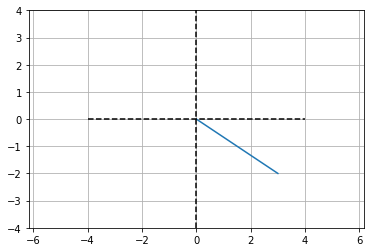

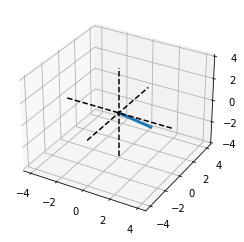

In [14]:
# 2-dimensional vector
v2 = [ 3, -2 ]

# 3-dimensional vector
v3 = [ 4, -3, 2 ]

# row to column (or vice-versa):
v3t = np.transpose(v3)

# plot v2
fig = plt.figure()
ax = fig.gca()
ax.plot([0,v2[0]],[0,v2[1]])
ax.axis('equal')
# plot x,y axes
ax.plot([-4, 4],[0, 0],'k--')
ax.plot([0, 0],[-4, 4],'k--')
ax.grid()
ax.axis((-4, 4, -4, 4))
fig.show()

# plot v3
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.gca(projection='3d')
# plot x,y,z axis
ax.plot([0, v3[0]],[0, v3[1]],[0, v3[2]],linewidth=3)
ax.plot([0, 0],[0, 0],[-4, 4],'k--')
ax.plot([0, 0],[-4, 4],[0, 0],'k--')
ax.plot([-4, 4],[0, 0],[0, 0],'k--')
fig.show()

### Addition and subtraction

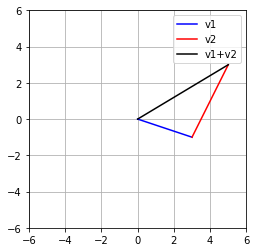

In [22]:
# two vectors in R2
v1 = np.array([ 3, -1 ])
v2 = np.array([ 2,  4 ])
v3 = v1 + v2

# plot v1, v2 and v3
plt.plot([0, v1[0]],[0, v1[1]],'b',label='v1')
plt.plot([v1[0], v2[0] + v1[0]], [v1[1], v2[1] + v1[1]], 'r',label='v2')
plt.plot([0, v3[0]],[0, v3[1]],'k',label='v1+v2')

plt.legend()
plt.axis('square')
plt.axis((-6, 6, -6, 6 ))
plt.grid()
plt.show()

### Vector-scalar multiplication

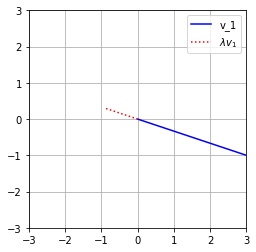

In [31]:
# vector
v1 = np.array([ 3, -1 ])
# scalar
l  = -.3
# vector-scalar multiplication
v1m = v1 * l

# plot them
plt.plot([0, v1[0]],[0, v1[1]],'b',label='v_1')
plt.plot([0, v1m[0]],[0, v1m[1]],'r:',label='$\lambda v_1$')

plt.legend()
plt.axis('square')
plt.axis((-3,3,-3,3))
plt.grid()
plt.show()

## Vector-vector multiplication: the dot product

In [40]:
v1 = np.array([ 1, 2, 3, 4, 5, 6 ])
v2 = np.array([ 0, -4, -2, -3, 6, 5 ])

# method 1
dp = sum(np.multiply(v1,v2))
print(f"np.multiply(v1,v2) = {dp}")

# method 2
dp = np.dot(v1,v2)
print(f"np.dot(v1,v2) = {dp}")

# method 3
dp = np.matmul(v1,v2)
print(f"np.matmul(v1,v2) = {dp}")

# method 4
dp = 0 
for i in range(0,len(v1)):
    # multiply corresponding element and sum
    dp = dp + v1[i]*v2[i]
    
print(dp)

np.multiply(v1,v2) = 34
np.dot(v1,v2) = 34
np.matmul(v1,v2) = 34
34


In [59]:
n = 10

## Distributive property holds

a = np.random.randn(n)
b = np.random.randn(n)
c = np.random.randn(n)

res1 = np.dot(a, (b+c))
res2 = np.dot(a,b) + np.dot(a,c)

print(f"a(b + c) = {res1}; ab + ac = {res2}")

## Associative property does not hold

a = np.random.randn(n)
b = np.random.randn(n)
c = np.random.randn(n)

res1 = np.dot(a, np.dot(b,c))
res2 = np.dot(np.dot(a,b), c)

print(f"a(bc) = {res1}; (ab)c = {res2}")

### Special cases where associative property holds

# 1) one vector is the zeros vector
# 2) a==b==c

a(b + c) = 2.887046583546022; ab + ac = 2.887046583546023
a(bc) = [-1.08860383 -1.52747533  1.09727557  0.44145863  2.84177719  4.02673381
 -1.94685308 -2.26167021  0.57415892  3.33731168]; (ab)c = [-2.42168461  1.20742527  0.21880753  0.89925468  1.01981424  3.79193326
  3.25467834  1.41088474 -3.5607166   3.4162138 ]


### Vector length

In [60]:
v1 = np.array([ 1, 2, 3, 4, 5, 6, ])

# methods 1-4, just like with the regular dot product, e.g.:
vl_0 = np.sqrt( sum( np.multiply(v1,v1)) )
# vl = np.sqrt( sum( np.dot(v1,v1)) )
# vl = np.sqrt( sum( np.matmul(v1,v1)) )

# method 5: take the norm
vl_1 = np.linalg.norm(v1)

print(vl_0, vl_1)

9.539392014169456 9.539392014169456


### Geometric perspective

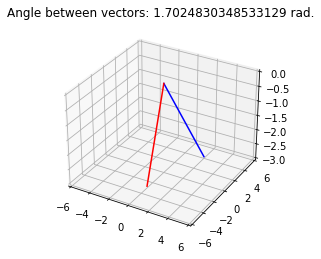

In [66]:
v1 = np.array([ 2,  4, -3 ])
v2 = np.array([ 0, -3, -3 ])

# compute the angle (radians) between two vectors
ang = np.arccos( np.dot(v1,v2) / (np.linalg.norm(v1)*np.linalg.norm(v2)) )

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot([0, v1[0]],[0, v1[1]],[0, v1[2]],'b')
ax.plot([0, v2[0]],[0, v2[1]],[0, v2[2]],'r')

plt.axis((-6, 6, -6, 6))
plt.title(f"Angle between vectors: {ang} rad.")
plt.show()

### Equivalence of algebraic and geometric dot product formulas

In [70]:
v1 = np.array([ 2,  4, -3 ])
v2 = np.array([ 0, -3, -3 ])

# algebraic
dp_a = np.dot( v1,v2 )

# geometric
dp_g = np.linalg.norm(v1)*np.linalg.norm(v2)*np.cos(ang)

# print dot product to command
print(dp_a)
print(dp_g)

-3
-3.0000000000000013


## Hadamard multiplication and outer product

In [74]:
## Hadamard multiplication

w1 = [ 1, 3, 5 ]
w2 = [ 3, 4, 2 ]

w3 = np.multiply(w1,w2)
print(w3)

## outer product

v1 = np.array([  1, 2, 3 ])
v2 = np.array([ -1, 0, 1 ])

print(np.outer(v1,v2))

# terrible programming, but helps conceptually:
op = np.zeros((len(v1),len(v1)))
for i in range(0,len(v1)):
    for j in range(0,len(v2)):
        op[i,j] = v1[i] * v2[j]

print(op)

[ 3 12 10]
[[-1  0  1]
 [-2  0  2]
 [-3  0  3]]
[[-1.  0.  1.]
 [-2.  0.  2.]
 [-3.  0.  3.]]


## Cross product

[15 20  1]


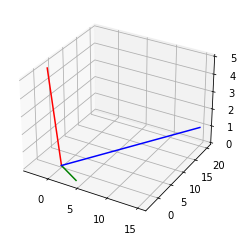

In [88]:
v1  = [ -3,  2, 5 ]
v2  = [  4, -3, 0 ]

# Python's cross-product function
v3a = np.cross( v1,v2 )
print(v3a)

# "manual" method
v3b = [ [v1[1]*v2[2] - v1[2]*v2[1]],
        [v1[2]*v2[0] - v1[0]*v2[2]],
        [v1[0]*v2[1] - v1[1]*v2[0]] ]

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot([0, v1[0]],[0, v1[1]],[0, v1[2]],'r')
ax.plot([0, v2[0]],[0, v2[1]],[0, v2[2]],'g')
ax.plot([0, v3a[0]],[0, v3a[1]],[0, v3a[2]],'b')

plt.show()

## Unit vector

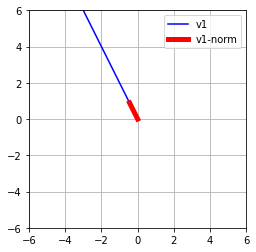

In [90]:
v1 = np.array([ -3, 6 ])
mu = 1/np.linalg.norm(v1)
v1n = v1*mu

plt.plot([0, v1[0]],[0, v1[1]],'b',label='v1')
h=plt.plot([0, v1n[0]],[0, v1n[1]],'r',label='v1-norm')
plt.setp(h,linewidth=5)

# axis square
plt.axis('square')
plt.axis(( -6, 6, -6, 6 ))
plt.grid()
plt.legend()
plt.show()

## Span

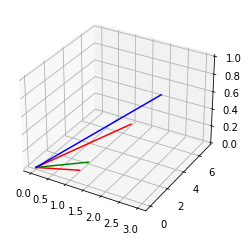

In [96]:
# set S
S1 = np.array([1, 1, 0])
S2 = np.array([1, 7, 0])

# vectors v and w
v = np.array([1, 2, 0])
w = np.array([3, 2, 1])

# draw vectors
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot([0, S1[0]],[0, S1[1]],[0, S1[2]],'r')
ax.plot([0, S2[0]],[0, S2[1]],[0, S2[2]],'r')

ax.plot([0, v[0]],[0, v[1]],[0, v[2]],'g')
ax.plot([0, w[0]],[0, w[1]],[0, w[2]],'b')

plt.show()